In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("data/000777.csv")
data = data.iloc[:, 3:]
data

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,21.17,21.29,20.90,20.90,20.86,0.31,1.4861,1.0687,4097505,8.666473e+07,8.116950e+09,8.116950e+09
1,20.86,21.14,20.82,21.12,21.12,-0.26,-1.2311,1.0455,4008703,8.392668e+07,7.998091e+09,7.998091e+09
2,21.12,21.44,21.09,21.40,21.37,-0.25,-1.1699,0.9220,3535002,7.529256e+07,8.097780e+09,8.097780e+09
3,21.37,21.49,20.75,21.17,21.15,0.22,1.0402,1.3459,5160269,1.096526e+08,8.193634e+09,8.193634e+09
4,21.15,22.50,20.28,22.50,22.53,-1.38,-6.1252,3.1691,12150966,2.619479e+08,8.109282e+09,8.109282e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
4731,10.98,11.50,10.90,11.49,11.53,-0.55,-4.7702,16.7164,4513434,5.010548e+07,8.235000e+08,2.964600e+08
4732,11.53,11.80,10.81,11.30,10.97,0.56,5.1048,31.2442,8435941,9.504755e+07,8.647500e+08,3.113100e+08
4733,10.97,10.97,10.33,10.35,9.97,1.0,10.0301,46.3580,12516652,1.350109e+08,8.227500e+08,2.961900e+08
4734,9.97,9.97,8.48,8.75,9.06,0.91,10.0442,42.3227,11427140,1.085246e+08,7.477500e+08,2.691900e+08


In [4]:
# X[开盘价、前收盘价、总市值、流通市值]
# Y[1: 涨; -1:跌]
X = np.array(data.iloc[:, [3,4,10,11]].replace('None', 0), dtype=np.float64)
Y = np.array(data.iloc[:, 6].replace('None', 0), dtype=np.float64)
Y[Y > 0] = 1
Y[Y <= 0] = -1
Y = np.int32(Y)

In [12]:
sp = 10
kf = KFold(n_splits = sp, shuffle = True)
svm = SVC()
res = []
for i, (traini, testi) in enumerate(kf.split(X)):
  print(traini.size)
  print(testi.size)
  trainX = X[traini, :]
  trainY = Y[traini]
  testX = X[testi, :]
  testY = Y[testi]
  svm.fit(trainX, trainY)
  print(f"{i+1}/{sp}")
  r = f1_score(testY, svm.predict(testX))
  print(r)
  res.append(r)


4262
474
1/10
0.540084388185654
4262
474
2/10
0.5086956521739131
4262
474
3/10
0.5276595744680852
4262
474
4/10
0.5532786885245902
4262
474
5/10
0.45939675174013916
4262
474
6/10
0.5073995771670191
4263
473
7/10
0.45161290322580644
4263
473
8/10
0.4955357142857143
4263
473
9/10
0.5347368421052632
4263
473
10/10
0.47247706422018354


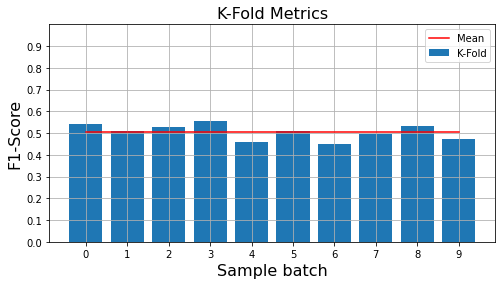

In [17]:
x = np.arange(len(res))

plt.rcParams['figure.figsize'] = (8,4)
plt.bar(x, res)
plt.plot(x, np.ones_like(x)*np.mean(res), 'r')
plt.ylim([0,1])
plt.xticks(x)
plt.yticks(x/10)
plt.grid()
plt.title("K-Fold Metrics", fontsize = 16)
plt.xlabel("Sample batch", fontsize = 16)
plt.ylabel("F1-Score", fontsize = 16)
plt.legend([ "Mean", "K-Fold"])
plt.show()